#Project Overview:(1) Description: To adopt public API to investigate covid-19 information related to specific country and all the countries in the world.  
(2) Purpose:  To retrieve information about deaths and other details due to covid-19 related to countries and show them on the world map. 


 


# Import Libraies 

In [ ]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import date
import sqlite3
from tabulate import tabulate
from pandas.io import sql

# code to retrieve data from API

#Source 1: API 1 : Rapid API, URL https://covid-193.p.rapidapi.com/statistics

In [4]:
# Accessing Rapid API - COVID-19 data 
url = "https://covid-193.p.rapidapi.com/statistics"  

# query string : select other country
querystring = {"country":"india"}                                                  

#headers, key details
headers = {
	"X-RapidAPI-Key": "1892c8507amsh394ab3093c2eab2p1fc9a8jsn57e51c27368a",
	"X-RapidAPI-Host": "covid-193.p.rapidapi.com"
}

#getting from API
response = requests.get(url, headers=headers, params=querystring)
data=response.json()
data                                                                                 

{'get': 'statistics',
 'parameters': {'country': 'india'},
 'errors': [],
 'results': 1,
 'response': [{'continent': 'Asia',
   'country': 'India',
   'population': 1406631776,
   'cases': {'new': None,
    'active': 1552,
    'critical': None,
    'recovered': 44462510,
    '1M_pop': '31988',
    'total': 44995980},
   'deaths': {'new': None, '1M_pop': '378', 'total': 531918},
   'tests': {'1M_pop': '661721', 'total': 930797975},
   'day': '2023-08-08',
   'time': '2023-08-08T00:00:05+00:00'}]}

#the above data is in dictionary form


Code to covert dictionary to a #dataframe

In [5]:
df = pd.DataFrame.from_dict(data, orient='index')              
df = df.transpose()
df

,get,parameters,errors,results,response
0,statistics,{'country': 'india'},[],1,"[{'continent': 'Asia', 'country': 'India', 'po..."


#above information is limited to one country. Need multiple entries to get usable data for datascience project, let us try next API location


Source 2: API 2: API location : https://covid-api.com/api/  

In [2]:
# Function to get json data from Public API
def get_covid_data(API_url, endpoint):
    url = API_url + endpoint

    try:
        response = requests.get(url)
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {url}: {e}")
        return None

In [3]:
# Function to get single column data dictionary
def create_data_from_covid_data(data):                         
    if data is not None:
        df = pd.DataFrame(data)                                
        return df
    else:
        return None

In [4]:
# converts to multi column dataframe
def create_dataframe(df):                                     
        dataframe = df['data'].apply(pd.Series) 
        return dataframe


In [5]:
def API():
    API_url = 'https://covid-api.com/api/'                     #no key access - anyone can use
    endpoint='reports'
    data = get_covid_data(API_url,endpoint)                   #calling get covid data function
    df = create_data_from_covid_data(data)                    #calling create data from covid data function
    dataframeRep = create_dataframe(df)                       #calling create dataframe function        
    return dataframeRep

In [ ]:
dataframeReports = API()                                      #calling the AI function to get dataframeReports

we will use the above initial dataframeReports in our analysis

# code to data processing

Data Preprocessing of this initial ‘dataframeReports’:
- Generate the summary on missing values 
- Document any inconsistencies and potential outliers
- Clean and preprocess the retrieved data to handle missing values, inconsistencies and potential outliers. 
 

In [14]:
dataframeReports.head(5)                                               # first dataframe 

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,region
0,2023-03-09,209451,7896,0,0,0,0,2023-03-10 04:21:03,201555,0,0.0377,"{'iso': 'AFG', 'name': 'Afghanistan', 'provinc..."
1,2023-03-09,334457,3598,0,14,0,0,2023-03-10 04:21:03,330859,14,0.0108,"{'iso': 'ALB', 'name': 'Albania', 'province': ..."
2,2023-03-09,271496,6881,0,2,0,0,2023-03-10 04:21:03,264615,2,0.0253,"{'iso': 'DZA', 'name': 'Algeria', 'province': ..."
3,2023-03-09,47890,165,0,0,0,0,2023-03-10 04:21:03,47725,0,0.0034,"{'iso': 'AND', 'name': 'Andorra', 'province': ..."
4,2023-03-09,105288,1933,0,0,0,0,2023-03-10 04:21:03,103355,0,0.0184,"{'iso': 'AGO', 'name': 'Angola', 'province': '..."


In [15]:
dataframeReports.tail(5) 

,date,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,last_update,active,active_diff,fatality_rate,region
786,2023-03-09,11526994,43186,0,0,0,0,2023-03-10 04:21:03,11483808,0,0.0037,"{'iso': 'VNM', 'name': 'Vietnam', 'province': ..."
787,2023-03-09,703228,5708,0,0,0,0,2023-03-10 04:21:03,697520,0,0.0081,"{'iso': 'PSE', 'name': 'West Bank and Gaza', '..."
788,2023-03-09,11945,2159,0,0,0,0,2023-03-10 04:21:03,9786,0,0.1807,"{'iso': 'YEM', 'name': 'Yemen', 'province': ''..."
789,2023-03-09,343135,4057,0,0,0,0,2023-03-10 04:21:03,339078,0,0.0118,"{'iso': 'ZMB', 'name': 'Zambia', 'province': '..."
790,2023-03-09,264276,5671,0,0,0,0,2023-03-10 04:21:03,258605,0,0.0215,"{'iso': 'ZWE', 'name': 'Zimbabwe', 'province':..."


In [16]:
dataframeReports.shape

(791, 12)

In [17]:
dataframeReports.dtypes

date               object
confirmed           int64
deaths              int64
recovered           int64
confirmed_diff      int64
deaths_diff         int64
recovered_diff      int64
last_update        object
active              int64
active_diff         int64
fatality_rate     float64
region             object
dtype: object

Summary of initial dataframe : 12 columns (9 numeric and 3 objects: region, date, last_update)

In [18]:
 #only for numeric columns
dataframeReports.describe()                                                 

,confirmed,deaths,recovered,confirmed_diff,deaths_diff,recovered_diff,active,active_diff,fatality_rate
count,7.910000e+02,791.000000,791.0,791.000000,791.000000,791.0,7.910000e+02,791.000000,791.000000
mean,8.553031e+05,8700.046776,0.0,245.386852,2.343869,0.0,8.466031e+05,243.042984,0.015246
std,2.397051e+06,19993.091547,0.0,1412.119417,18.059342,0.0,2.382865e+06,1396.168046,0.025190
min,0.000000e+00,0.000000,0.0,0.000000,-1.000000,0.0,-3.380000e+02,-13.000000,0.000000
25%,6.179550e+04,534.500000,0.0,0.000000,0.000000,0.0,5.898450e+04,0.000000,0.004300
50%,2.111580e+05,2548.000000,0.0,0.000000,0.000000,0.0,2.075050e+05,0.000000,0.010300
75%,6.732080e+05,8297.000000,0.0,89.000000,0.000000,0.0,6.673000e+05,88.500000,0.019100
max,3.861851e+07,186138.000000,0.0,26285.000000,431.000000,0.0,3.845700e+07,25854.000000,0.533600


 Count of Missing Values & Percentage of Missing Values (in numeric columns)
                          

In [ ]:
column_names = ['confirmed', 'deaths', 'recovered', 'confirmed_diff', 'deaths_diff', 'recovered_diff', 'active', 'active_diff']

data = []
for column in column_names:
    missing_count = (dataframeReports[column] == 0).sum()
    missing_percentage = (missing_count / len(dataframeReports)) * 100
    data.append([column, missing_count, missing_percentage])

table_headers = ["Column Name", "Null Values", "Missing Percentage"]
table = tabulate(data, headers=table_headers, tablefmt='grid')

print(f'Total number of rows: {len(dataframeReports)}\n')
print(table)

let us examine object column 'region' and re adjust the other two objects (date/time stamp of columns 'date' and 'update'),later. 

column 'region' is filled with dictionaries as shown below

In [22]:
data=dataframeReports['region']                                      
data

0      {'iso': 'AFG', 'name': 'Afghanistan', 'provinc...
1      {'iso': 'ALB', 'name': 'Albania', 'province': ...
2      {'iso': 'DZA', 'name': 'Algeria', 'province': ...
3      {'iso': 'AND', 'name': 'Andorra', 'province': ...
4      {'iso': 'AGO', 'name': 'Angola', 'province': '...
                             ...                        
786    {'iso': 'VNM', 'name': 'Vietnam', 'province': ...
787    {'iso': 'PSE', 'name': 'West Bank and Gaza', '...
788    {'iso': 'YEM', 'name': 'Yemen', 'province': ''...
789    {'iso': 'ZMB', 'name': 'Zambia', 'province': '...
790    {'iso': 'ZWE', 'name': 'Zimbabwe', 'province':...
Name: region, Length: 791, dtype: object

In [23]:
# Code to covert the column 'region' contents to another dataframe

In [24]:
dataframeLocation=data.apply(pd.Series)                                #introducing second dataframe
dataframeLocation

,iso,name,province,lat,long,cities
0,AFG,Afghanistan,,33.9391,67.7100,[]
1,ALB,Albania,,41.1533,20.1683,[]
2,DZA,Algeria,,28.0339,1.6596,[]
3,AND,Andorra,,42.5063,1.5218,[]
4,AGO,Angola,,-11.2027,17.8739,[]
...,...,...,...,...,...,...
786,VNM,Vietnam,,14.0583,108.2772,[]
787,PSE,West Bank and Gaza,,31.9522,35.2332,[]
788,YEM,Yemen,,15.552726999999999,48.516388,[]
789,ZMB,Zambia,,-13.1339,27.8493,[]


''' Data Preprocessing of ‘dataframeLocation’:
- Generate the summary of missing values 
- Document any inconsistencies and potential outliers
- Clean and preprocess the retrieved data to handle missing values, inconsistencies and potential outliers. 
''' 

In [26]:
dataframeLocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   iso       791 non-null    object
 1   name      791 non-null    object
 2   province  791 non-null    object
 3   lat       775 non-null    object
 4   long      775 non-null    object
 5   cities    791 non-null    object
dtypes: object(6)
memory usage: 37.2+ KB


In [27]:
dataframeLocation.dtypes

iso         object
name        object
province    object
lat         object
long        object
cities      object
dtype: object

In [28]:
dataframeLocation.value_counts 

<bound method DataFrame.value_counts of      iso                name province                 lat       long cities
0    AFG         Afghanistan                      33.9391    67.7100     []
1    ALB             Albania                      41.1533    20.1683     []
2    DZA             Algeria                      28.0339     1.6596     []
3    AND             Andorra                      42.5063     1.5218     []
4    AGO              Angola                     -11.2027    17.8739     []
..   ...                 ...      ...                 ...        ...    ...
786  VNM             Vietnam                      14.0583   108.2772     []
787  PSE  West Bank and Gaza                      31.9522    35.2332     []
788  YEM               Yemen           15.552726999999999  48.516388     []
789  ZMB              Zambia                     -13.1339    27.8493     []
790  ZWE            Zimbabwe                     -19.0154    29.1549     []

[791 rows x 6 columns]>

In [29]:
dataframeLocation.describe()

,iso,name,province,lat,long,cities
count,791,791,791,775,775,791
unique,196,196,599,769,759,52
top,RUS,Russia,,0.0,0.0,[]
freq,83,83,174,4,4,740


Summary of this dataframe : the columns have intrinsic information especially latitude and longitude, usable for plotting on world map.                                                                                                                             As this is aimed at limited investigation, let us drop cities and provinces for now. 

#somecode for modifying /changing/dropping columns to handle inconsistancies 

In [30]:
dataframeLocation['cities'].values 

array([list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), list([]), list([]), list([]), list(

'''There exists some dictionary/empty lists in 'cities' column. Which can be made into another dataframe. 
But for simplicity of this project i dont wish to consider another dataframe. 
so i drop the cities column from the dataframeLocation'''

In [32]:
dataframeLocation.drop(['cities'], axis='columns', inplace=True)

In [33]:
dataframeLocation['province'].values 

array(['', '', '', '', '', '', '', '', 'Australian Capital Territory',
       'New South Wales', 'Northern Territory', 'Queensland',
       'South Australia', 'Tasmania', 'Victoria', 'Western Australia', '',
       '', '', '', '', '', '', 'Antwerp', 'Brussels', 'East Flanders',
       'Flemish Brabant', 'Hainaut', 'Liege', 'Limburg', 'Luxembourg',
       'Namur', 'Unknown', 'Walloon Brabant', 'West Flanders', '', '', '',
       '', '', '', 'Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia',
       'Ceara', 'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Para',
       'Paraiba', 'Parana', 'Pernambuco', 'Piaui', 'Rio Grande do Norte',
       'Rio Grande do Sul', 'Rio de Janeiro', 'Rondonia', 'Roraima',
       'Santa Catarina', 'Sao Paulo', 'Sergipe', 'Tocantins', '', '', '',
       '', '', '', '', '', 'Alberta', 'British Columbia',
       'Diamond Princess', 'Grand Princess', 'Manitoba', 'New Brunswick',
       'Newfoun

In [34]:
dataframeLocation.drop(['province'], axis='columns', inplace=True)

Data preprocessing to handle inconsistencies: 
  - In general, any dataframe need one unique/primary identifier (key) usable for SQL requirements
  
-for dataframeLocation, let us make ‘iso’ column, as a primary key. 

-for dataframeReports, let us add ‘iso’ column in the place of 'region' column to serve as primary key.

-finally, drop ‘region’ in dataframeReports, which is clustered (note: we already used  'region' of dataframeReports to make dataframeLocation).                                                                                                             
   see the following steps for details
''' 

In [36]:
# adding 'ISO' of dataframeLocation to  dataframeReports 
dataframeReports['iso'] = dataframeLocation['iso']
print(dataframeReports) 

           date  confirmed  deaths  recovered  confirmed_diff  deaths_diff  \
0    2023-03-09     209451    7896          0               0            0   
1    2023-03-09     334457    3598          0              14            0   
2    2023-03-09     271496    6881          0               2            0   
3    2023-03-09      47890     165          0               0            0   
4    2023-03-09     105288    1933          0               0            0   
..          ...        ...     ...        ...             ...          ...   
786  2023-03-09   11526994   43186          0               0            0   
787  2023-03-09     703228    5708          0               0            0   
788  2023-03-09      11945    2159          0               0            0   
789  2023-03-09     343135    4057          0               0            0   
790  2023-03-09     264276    5671          0               0            0   

     recovered_diff          last_update    active  active_diff

In [ ]:
# let us drop the column 'region' as we SUBSTITUTED IT WITH 'iso' COLUMN 
del dataframeReports['region']
dataframeReports

 The other two objects of dataframeReports are checked for errors and reassigned as 2 columns.

In [42]:
dataframeReports['date'] = '2023-03-09 00:00:00'
dataframeReports['date'] = pd.to_datetime(dataframeReports['date'])
dataframeReports['last_update'] = pd.to_datetime(dataframeReports['last_update'])

# Codes and Plots / maps, to further investigate dataframes

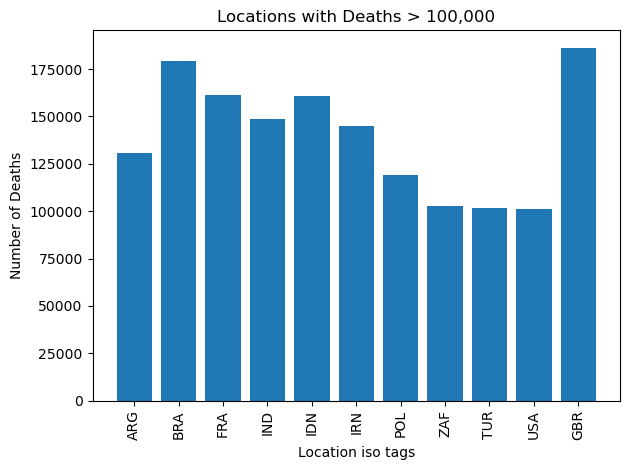

In [43]:
import matplotlib.pyplot as plt

filtered_data = dataframeReports[dataframeReports['deaths'] > 100000]
plt.bar(filtered_data['iso'], filtered_data['deaths'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Location iso tags')
plt.ylabel('Number of Deaths')
plt.title('Locations with Deaths > 100,000')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

The above plot shows the number of deaths vs countries (column ISO denotes country codes)

In [ ]:
#pair plot investigation of dataframeReports

sns.pairplot(dataframeReports)
plt.suptitle('Pair Plot')
plt.show()

Plots with zeros in anyone of the column are indicated by horizontal or vertical lines, and in some plots, data is concentrated closer to the origins/axis. They do not show independent nature. the deaths are higher for higher confirmed/active cases. This can be examined by running some plots individually. Furthermore, we can draw some other plots to understand correlations between variables. 

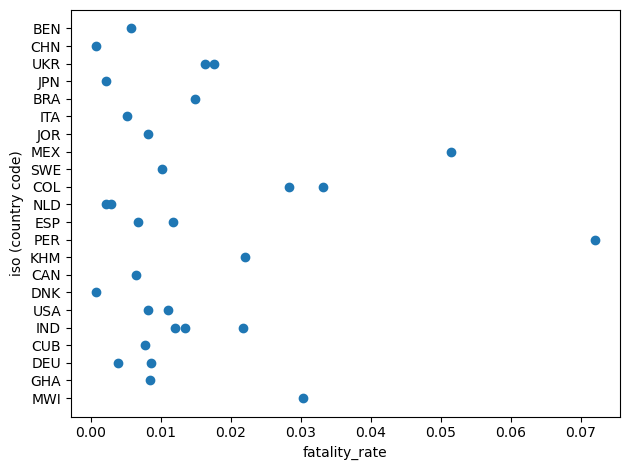

In [45]:
# scatter plot 
np.random.seed(123)
dataframeReportssample = dataframeReports.sample(30)

plt.scatter(dataframeReportssample['fatality_rate'],dataframeReportssample['iso'])

plt.xlabel('fatality_rate')
plt.ylabel('iso (country code)')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

The plot show that most of the countries have lower fatality rates.

<Axes: >

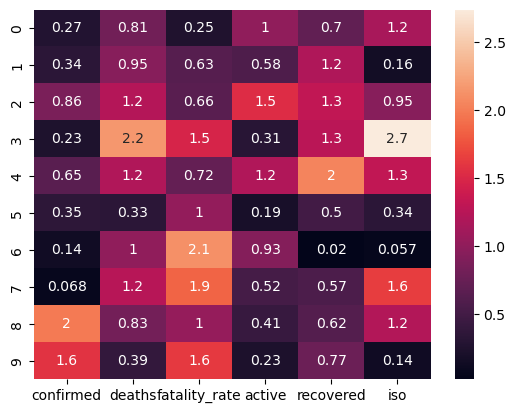

In [46]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

sample_size =10
Rows_number= ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']

Cols = ['confirmed','deaths', 'fatality_rate', 'active','recovered', 'iso']
Cols_number=len(Cols)

df = DataFrame(abs(np.random.randn(sample_size, Cols_number)), index=Rows_number, columns=Cols)




sns.heatmap(df, annot=True)


The above heatmap shows relationship between 10 rows (covid data of 10 different latitudes/longitudes) and 6 variables 

C:\Users\User\AppData\Local\Temp\ipykernel_17316\1176854566.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframeReports.corr()


<Axes: >

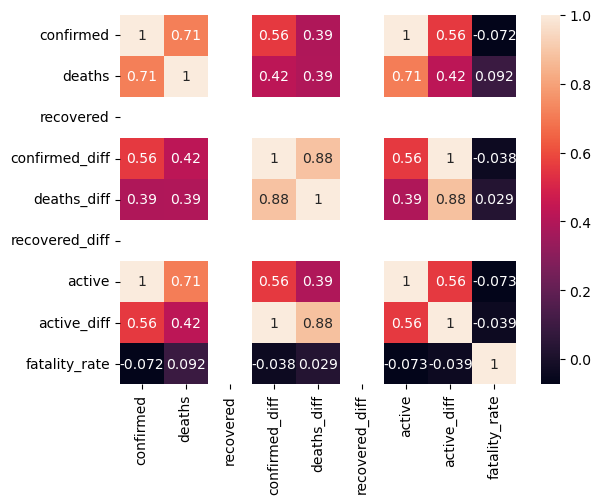

In [47]:
import seaborn as sb
corr = dataframeReports.corr()
sb.heatmap(corr, annot=True)


The above heatmap shows correlationship of numeric variables

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
dataframeReportssample = dataframeReports.tail(100)
dataframeLocationsample = dataframeLocation.tail(100)

# Creating a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subplot for 'dataframeReportssample'
axes[0].scatter(dataframeReportssample['fatality_rate'], dataframeReportssample['iso'])
axes[0].set_xlabel('fatality_rate')
axes[0].set_ylabel('iso')
axes[0].set_title('Scatter Plot for dataframeReportssample')

# Subplot for 'dataframeLocationsample'
axes[1].scatter(dataframeLocationsample['name'], dataframeLocationsample['iso'])
axes[1].set_xlabel('Country names')
plt.xticks(rotation=90)
axes[1].set_ylabel('iso (country code)')
axes[1].set_title('Scatter Plot for dataframeLocationsample')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

the above scatter plots show relationship between countries and fatality rates. 

In [9]:
# let us further investigate dataframeReports using profiling 

'''
as my jupyter notbook is unable to install profiling or sweetviz packages,
i will transfer dataframeReports to csv file and store in GITHUB,
which can be used in colab to do profiling of the dataframe
''' 

In [ ]:
#create a csv file
dataframeReports.to_csv('forprofilingpurposecorrected.csv', sep=',', index=False, encoding='utf-8')


''' colab link to find information on dataframeReports
https://github.com/venuannamdas/mini_proj/blob/master/DataAnlytics_profiling_dtaframeReports.ipynb
''' 

''' SQL Database Integration:
   - Set up a SQL database (e.g., SQLite or MySQL) using Python and store the preprocessed data into the database.
   '''

[note:
column names of dataframeReports: date	confirmed,	deaths,	recovered,	confirmed_diff,	deaths_diff,	recovered_diff	last_update	active	active_diff	fatality_rate	iso,
 & column names of dataframeLocation: column_names = ['iso', 'name', 'lat', 'long']]
 
Let us start SQL query based investigations into dataframeReports and dataframeLocation as follows

# Codes to work on SQL Quries

In [100]:
#SQL Connect code

connection =sqlite3.connect("SQLfolder\DataAnalytics2023.db")

In [101]:
cursor = connection.cursor()

In [102]:
#dataframeReports  to sql table 
dataframeReports.to_sql('covid_reports', connection, if_exists='replace', index = False)

791

In [103]:
query = 'Select  DISTINCT date, iso, max(deaths) FROM covid_reports'
cursor.execute(query)
cursor.fetchall()

[('2023-03-09 00:00:00', 'GBR', 186138)]

In [104]:
query1 = "SELECT DISTINCT iso, fatality_rate FROM covid_reports ORDER BY deaths DESC LIMIT 10"

cursor.execute(query1)
result1 = cursor.fetchall()

print("Higher fatality rate need not always have higher deaths, as proved below:")
print(f"From deaths between 10000 AND 20000 occurred {len(result1)} times")
print("iso, fatality_rate")
for row in result1:
    iso, fatality_rate = row
    print(f"{iso}, {fatality_rate}")

Higher fatality rate need not always have higher deaths, as proved below:
From deaths between 10000 AND 20000 occurred 10 times
iso, fatality_rate
GBR, 0.009
BRA, 0.0277
IDN, 0.0239
IND, 0.0182
IRN, 0.0191
ARG, 0.013
POL, 0.0185
ZAF, 0.0252
TUR, 0.006
USA, 0.0083


In [106]:
query1 = '''
    SELECT COUNT(deaths) FROM covid_reports
    WHERE iso = 'IND' AND deaths BETWEEN 2500 AND 5000;
'''

query2 = '''
    SELECT COUNT(deaths) FROM covid_reports
    WHERE iso = 'IND' AND deaths BETWEEN 500 AND 2500;
'''

query3 = '''
    SELECT COUNT(deaths) FROM covid_reports
    WHERE iso = 'IND' AND deaths BETWEEN 100 AND 500;
'''
cursor.execute(query1)
result1 = cursor.fetchall()

cursor.execute(query2)
result2 = cursor.fetchall()

cursor.execute(query3)
result3 = cursor.fetchall()

# Now you have the results for both queries in result1 and result2
print(f"In INDIA, deaths between 2500 AND 5000 occured {result1} times")
print(f"          deaths between 500 AND 2500 occured {result2} times")
print(f"          deaths between 100 AND 500 occured {result3} times")


In INDIA, deaths between 2500 AND 5000 occured [(4,)] times
          deaths between 500 AND 2500 occured [(8,)] times
          deaths between 100 AND 500 occured [(4,)] times


from first table based on dataframeReports, we could get infomation such as number of times of occurrance of range of death in any specific country. 

Now, let us sql connect to next table based on dataframeLocation

In [107]:
#dataframeLocation  to sql table 
dataframeLocation.to_sql('covid_location', connection, if_exists='replace', index = False)

791

In [108]:
query = 'Select  covid_reports.deaths, covid_location.name, covid_location.iso, covid_location.lat, covid_location.long FROM covid_reports join covid_location ON covid_reports.iso=covid_location.iso LIMIT 10'
cursor.execute(query)
cursor.fetchall()

[(7896, 'Afghanistan', 'AFG', '33.9391', '67.7100'),
 (3598, 'Albania', 'ALB', '41.1533', '20.1683'),
 (6881, 'Algeria', 'DZA', '28.0339', '1.6596'),
 (165, 'Andorra', 'AND', '42.5063', '1.5218'),
 (1933, 'Angola', 'AGO', '-11.2027', '17.8739'),
 (146, 'Antigua and Barbuda', 'ATG', '17.0608', '-61.7964'),
 (130472, 'Argentina', 'ARG', '-38.4161', '-63.6167'),
 (8727, 'Armenia', 'ARM', '40.0691', '45.0382'),
 (228, 'Australia', 'AUS', '-12.4634', '130.8456'),
 (228, 'Australia', 'AUS', '-28.0167', '153.4000')]

In [109]:
query = 'SELECT  covid_location.name, covid_reports.deaths AS DEATHS, covid_location.lat AS LATITUDE, covid_location.long AS LONGITUDE FROM covid_location JOIN covid_reports ON covid_location.iso=covid_reports.iso ORDER BY covid_location.name DESC'
cursor.execute(query)
cursor.fetchall()

[('Zimbabwe', 5671, '-19.0154', '29.1549'),
 ('Zambia', 4057, '-13.1339', '27.8493'),
 ('Yemen', 2159, '15.552726999999999', '48.516388'),
 ('West Bank and Gaza', 5708, '31.9522', '35.2332'),
 ('Vietnam', 43186, '14.0583', '108.2772'),
 ('Venezuela', 5854, '6.4238', '-66.5897'),
 ('Vanuatu', 14, '-15.3767', '166.9592'),
 ('Uzbekistan', 1637, '41.3775', '64.5853'),
 ('Uruguay', 7617, '-32.5228', '-55.7658'),
 ('United Kingdom', 0, '18.2206', '-63.0686'),
 ('United Kingdom', 0, '18.2206', '-63.0686'),
 ('United Kingdom', 0, '18.2206', '-63.0686'),
 ('United Kingdom', 0, '18.2206', '-63.0686'),
 ('United Kingdom', 8, '18.2206', '-63.0686'),
 ('United Kingdom', 12, '18.2206', '-63.0686'),
 ('United Kingdom', 37, '18.2206', '-63.0686'),
 ('United Kingdom', 38, '18.2206', '-63.0686'),
 ('United Kingdom', 64, '18.2206', '-63.0686'),
 ('United Kingdom', 66, '18.2206', '-63.0686'),
 ('United Kingdom', 111, '18.2206', '-63.0686'),
 ('United Kingdom', 116, '18.2206', '-63.0686'),
 ('United Kingdo

In [110]:
query = 'SELECT  covid_location.name AS COUNTRY_NAME, covid_reports.deaths AS DEATHS, covid_location.lat AS LATITUDE, covid_location.long AS LONGITUDE FROM covid_location JOIN covid_reports ON covid_location.iso=covid_reports.iso limit 1'
cursor.execute(query)
cursor.fetchall()

[('Afghanistan', 7896, '33.9391', '67.7100')]

we can get information of country code, country name,  longitude and latitude using this table. however, complete information of covid-19 can be retrived wehn we join these two tables(covid_reports, covid_location).

In [111]:
# BELOW IS THE CODE FOR LOCATING ANY COUNTRY/countries USING LATITUDE AND LONGITUDE. 

In [112]:
# Execute the SQL query to fetch data from the database
query = "SELECT covid_location.name AS country_name,  covid_location.lat AS LATITUDE, covid_location.long AS LONGITUDE, covid_reports.deaths AS DEATHS FROM covid_location JOIN covid_reports ON covid_location.iso = covid_reports.iso LIMIT 791"
cursor.execute(query)

# Fetch rows UPTO 50
ROWS=50 #CAN BE CHANGED BASED ON YOUR CHOICE 
rows = cursor.fetchmany(ROWS)

# Convert the result set into a Pandas DataFrame for easier manipulation
columns = ['country_name', 'latitude', 'longitude', 'deaths']
df = pd.DataFrame(rows, columns=columns)

# Initialize the map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Mark each country on the map
for _, country_data in df.iterrows():
    folium.Marker(
        location=[country_data['latitude'], country_data['longitude']],
        popup=f"A city in the Country: {country_data['country_name']}<br><br>Deaths: {country_data['deaths']}",
        tooltip=country_data['country_name']
    ).add_to(world_map)

# Save the map to an HTML file
world_map.save("covid_data_map.html")


BELOW IS THE CODE FOR LOCATING ANY COUNTRY/countries USING required info. click on the markers on the map based html, to view the pop-up of information.

In [119]:
import pandas as pd
import folium

def fetch_data_from_database(cursor):
    query = """
        SELECT
            cl.name AS COUNTRY_NAME,
            cl.lat AS LATITUDE,
            cl.long AS LONGITUDE,
            cr.deaths AS DEATHS,
            cr.fatality_rate AS FATALITY_RATE,
            cr.confirmed AS CONFIRMED,
            cr.active AS ACTIVE
        FROM covid_location AS cl
        JOIN covid_reports AS cr ON cl.iso = cr.iso
        LIMIT 100
    """
    cursor.execute(query)
    rows = cursor.fetchall()
    return rows

def create_map_marker(country_data):
    country_name, latitude, longitude, deaths, fatality_rate, confirmed, active = country_data
    popup_content = (
        f"In a city/province of Country: {country_name},"
        f"Deaths: {deaths},"
        f"Fatality Rate: {fatality_rate},"
        f"Confirmed Cases: {confirmed},"
        f"Active Cases: {active}"
    )
    marker = folium.Marker(
        location=[latitude, longitude],
        popup=folium.Popup(html=popup_content, parse_html=True),
        tooltip= [country_name, deaths, fatality_rate, confirmed, active]
        
    )
    return marker


#cursor = connection.cursor()  # Replace with your cursor initialization

# Fetch data from the database
data = fetch_data_from_database(cursor)

# Initialize the map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add markers to the map
for country_data in data:
    marker = create_map_marker(country_data)
    marker.add_to(world_map)

# Save the map to an HTML file
world_map.save("covid_data_map.html")




In [ ]:
# Close the database connection when done
connection.close()

Some Conclusions 
1)Fatality rate is not exactly related to the number of deaths between countries.

2)higher confirmed and active cases leading to higher death  

3)From SQL: we can get the number of occurrences of a range of deaths (for example we can find, how many times people between 5000 to 10,000 died in a particular country during covid-19 period) 
Details can be popped up which contain the number of deaths, fatality rate, active cases, confirmed cases etc 


Suggestions for Future works:
1. City and Province data can be converted to another two data frames
2. Date/time stamp was dropped as only one single entity for used for the entire dataset 
